# First Principles Thinking

* Step 1: Identify any assumptions that you may have (batteries are $600/KwH - they're too expensive)
* Step 2: Breakdown the issues (the fundamentals - what materials go into a battery? Can I find them for cheap?)
* Step 3: Create new solutions (use your fundamental analysis and knowledge to create a solution)

https://www.youtube.com/watch?v=NV3sBlRgzTI

```
bins=[0, 13, 19, 61, sys.maxsize]
labels=['<12', 'Teen', 'Adult', 'Older']
(
  pd.read_csv('data/train.csv')
    .pipe(replace_age_na, pclass_age_map)
    .query('Embarked == "S"')
    .assign(ageGroup = lambda df: pd.cut(df['Age'], bins=bins, labels=labels))
    .pivot_table(
        values='Survived', 
        columns='Pclass', 
        index='ageGroup', 
        aggfunc='mean')
    .rename_axis('', axis='columns')
    .rename('Class {}'.format, axis='columns')
    .style.format('{:.2%}')
)

```



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/My Drive/Kaggle'

/content/drive/My Drive/Kaggle


In [4]:
# EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

# Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

df = pd.read_csv('titanic_train.csv')
df.dtypes

passenger_id      int64
pclass            int64
name             object
sex              object
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
cabin            object
embarked         object
boat             object
body            float64
home.dest        object
survived          int64
dtype: object

In [5]:
df.isna().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [6]:
len(df)

850

In [7]:
df.drop(['cabin','boat','body','home.dest','passenger_id','name','ticket'], 
        axis=1,
        inplace=True)

df.isna().sum()

pclass        0
sex           0
age         174
sibsp         0
parch         0
fare          1
embarked      1
survived      0
dtype: int64

In [8]:
df.dtypes

pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
survived      int64
dtype: object

In [9]:
# Pipeline - SimpleImputer, OneHotEncoder, ColumnTransformer

# Categorical
categorical_columns = ['embarked'] # Fill with SimpleImputer -- Make 'S' the fill value
categorical_section = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant', fill_value='S')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

# Average
average_value = ['age','fare'] # Fill with SimpleImputer -- Mean of all the age.
average_section = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean'))
])

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
                     ('cat', categorical_section, categorical_columns),
                     ('avg', average_section, average_value) 
])

# Creating the model
model = Pipeline(steps=[
                        ('preprocessor', preprocessor),
                        ('model',RandomForestClassifier())
])

# Split the data
X = df.drop('survived', axis=1)
y = df.survived

# Seed and split into train & test
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Fit and Score
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6647058823529411

In [10]:
import pickle

pickle.dump(model, open('filename.pkl', 'wb')) # write binary

load_model = pickle.load(open('filename.pkl','rb')) # Read binary

In [12]:
load_model.score(X_test,y_test)

0.6647058823529411

In [13]:
from sklearn.model_selection import cross_val_score

model_cv_1 = cross_val_score(RandomForestClassifier(), X, y, cv=5, verbose=2, scoring=None)

model_cv_2 = cross_val_score(RandomForestClassifier(), X, y, cv=5, verbose=2, scoring='precision')

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'male'

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'female'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: '

In [14]:
from joblib import dump, load

dump(model, filename='model.joblib')

model_loaded = load(filename='model.joblib')

In [15]:
model_loaded.score(X_test,y_test)

0.6647058823529411

In [16]:
import tensorflow as tf
import numpy as np


ones = tf.ones(1,1)


In [17]:
nn_model = tf.keras.models.Sequential([
    tf.keras.Dense(10),
    tf.keras.Dense(100),
    tf.keras.Dense(100)
])

nn_model.compile(loss = 'binary_corssentropy',
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])


history = nn.model.fit(train_data,epochs=5)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>

In [19]:
# tf.random.shuffle()

# 1. ColumnTransformer
# 2. OneHotEncoder
# 3. ColumnTransformer
# 4. OneHotEncoder
# 5. Pipeline


# tf_1 = tf.constant([10,7],
#             [3,4],
#             [2,5]])

# tf.random.shuffle(tf_1)

tensor = tf.constant([[[1,2,3],
                      [4,5,6]],
                      [[7,8,9],
                       [10,11,12]],
                      [[13,14,15],
                       [16,17,18]]])

tensor.ndim

3

In [36]:
tf.random.set_seed(42)
print(tf.random.shuffle(tensor))
print('\n Seed global \n')

print('-'*40)

print('\n Seed not global \n')
print(tf.random.shuffle(tensor, seed=42))

tf.Tensor(
[[[ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]]

 [[ 1  2  3]
  [ 4  5  6]]], shape=(3, 2, 3), dtype=int32)

 Seed global 

----------------------------------------

 Seed not global 

tf.Tensor(
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]]], shape=(3, 2, 3), dtype=int32)


In [37]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,female,NaN,0,0,7.7333,Q,1
1,3,male,38.0,0,0,8.6625,S,0
2,3,female,30.0,1,1,24.1500,S,0
3,2,female,54.0,1,3,23.0000,S,1
4,2,male,40.0,0,0,13.0000,S,0


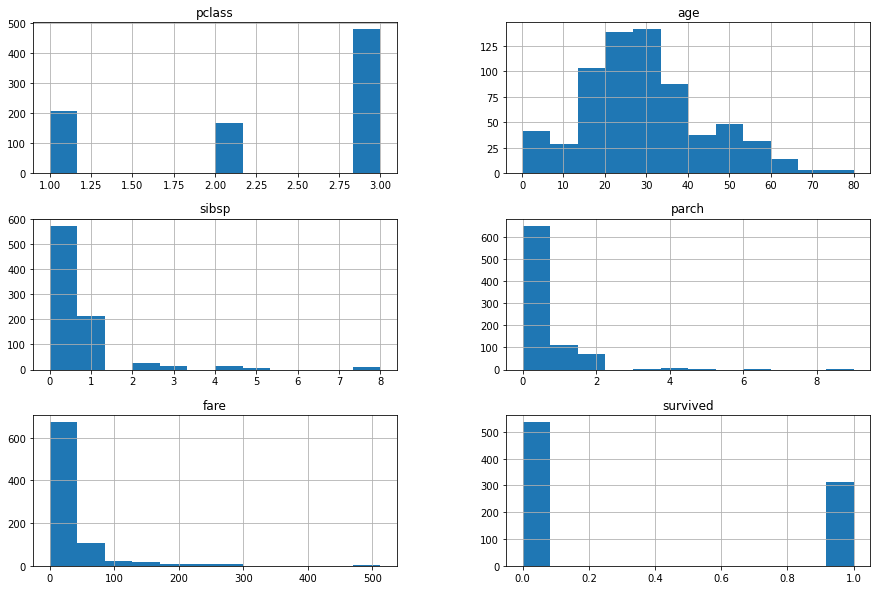

In [38]:
df.hist(bins=12, figsize=(15,10));